# Fraudulent Credit Card Payment Detector

~ Javier Requena

## Introduction

In this project, we will implement a fraudulent credit card payment detection system using machine learning and deep learning. To do this, we will use the "Credit Card Fraud Detection" dataset from Kaggle: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

## Objectives
- Perform data preprocessing: data cleaning, handling NaN values, etc.
- Address the almost certain data imbalance issue.
- Extract as much relevant information as possible from the data through results and visualizations.
- Decide and implement the classifier to be used.
- Evaluate the classification effectiveness using metrics.

## Getting Started

To begin, let's load all the libraries and modules that will be necessary during the execution of our project:

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import RobustScaler

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import sklearn.metrics

As we can see, our dataset consists of the following features:
- Time: time in seconds elapsed since the first transaction.
- V1 to V28: features resulting from the application of a PCA algorithm and anonymized for security reasons.
- Amount: amount in Euros (€) of the credit card payment.
- Class: A label indicating whether the transaction is fraudulent (1) or non-fraudulent (0).

In [2]:
card_data = pd.read_csv('creditcard.csv')
card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
card_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
card_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
card_data.shape

(284807, 31)

Since the data already comes with some preprocessing, we don't have any NaN values!

In [7]:
card_data.isna().sum().max()

0

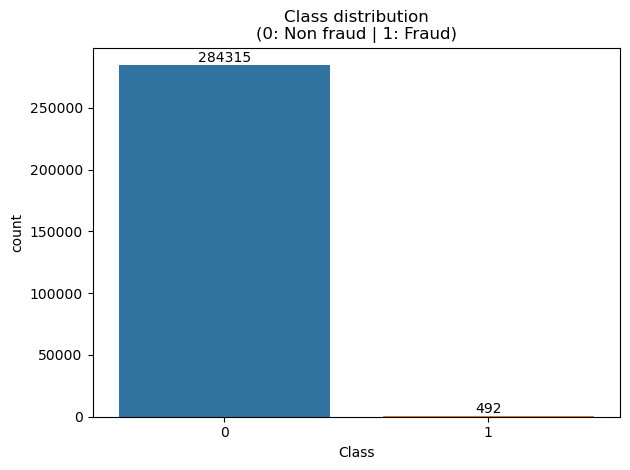

In [8]:
fig = sns.countplot(data=card_data, x="Class")
fig.bar_label(fig.containers[0])
plt.title("Class distribution\n(0: Non fraud | 1: Fraud)")
plt.tight_layout()
plt.show()

In [9]:
card_data["Class"].value_counts() / card_data.shape[0] * 100

0    99.827251
1     0.172749
Name: Class, dtype: float64

As we can see, the dataset is highly imbalanced. Out of the 284,807 rows, only 492 (0.173%) correspond to fraudulent transactions. Therefore, to avoid bias in our algorithm towards the dominant class, we should use techniques for handling imbalanced data. Let's see if this imbalance has any impact on the only two features whose meaning we know: Time and Amount.

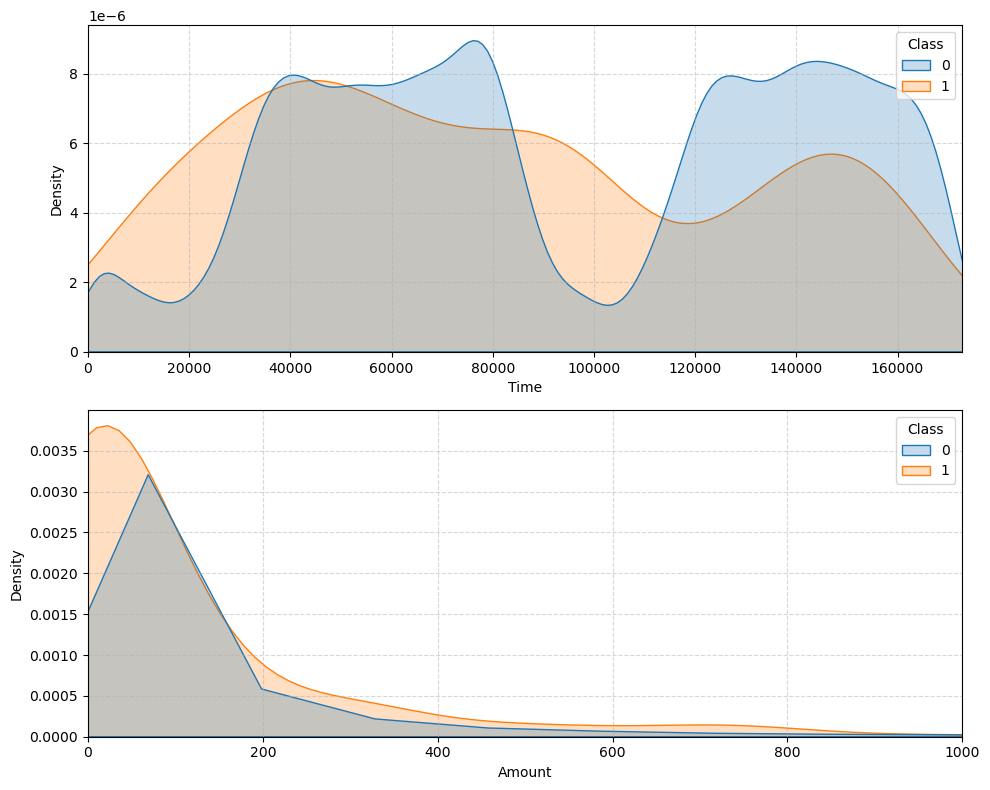

In [10]:
fig, ax = plt.subplots(2, 1, figsize=[10, 8])
sns.kdeplot(ax=ax[0], data=card_data, x="Time", hue="Class", common_norm=False, fill=True)
ax[0].set_xlim(min(card_data.Time), max(card_data.Time))
ax[0].grid(linestyle="dashed", alpha=0.5)

sns.kdeplot(ax=ax[1], data=card_data, x="Amount", hue="Class", common_norm=False, fill=True)
ax[1].set_xlim(min(card_data.Amount), 1000)
ax[1].grid(linestyle="dashed", alpha=0.5)

plt.tight_layout()
plt.show()

Fraudulent transactions seem to occur in a relatively stable manner throughout the hours, whereas legitimate transactions follow a more defined and logical pattern: they increase during the day and sharply decrease during the night.

The distribution of the transaction amounts for fraudulent and non-fraudulent transactions is quite similar. Fraudulent transactions have a lower median than legitimate ones, and similarly, the probability density function shows that they are more likely than legitimate transactions to involve relatively substantial amounts (greater than €200).

## Dealing with Imbalanced Data

### Random Undersampling

In this section, we will balance the dataframe to achieve a 50/50 ratio using the Random Undersampling technique. This involves randomly removing as many points from the majority class as necessary to make it have the same number of points as the minority class. For this purpose, we will leave the majority class (Non-Fraud) with 492 points out of the 284,315 we have. This is precisely one of the disadvantages of this method, as we will be discarding a significant amount of information that could be relevant.

In [11]:
fraud_data = card_data[card_data.Class == 1].copy()
valid_data = card_data[card_data.Class == 0].sample(fraud_data.shape[0])

In [12]:
subsampled_data = pd.concat([fraud_data, valid_data], axis=0)

In [13]:
subsampled_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269262,163610.0,2.064219,-0.218601,-0.705596,0.080056,-0.089666,-0.137886,-0.417309,-0.064279,1.257575,...,-0.171238,-0.295245,0.219989,-1.097586,-0.211505,-0.859024,0.067184,-0.036152,1.00,0
93578,64495.0,-0.490175,0.061239,1.742195,-1.719269,-0.652946,-1.042665,0.247893,-0.048597,-1.153044,...,0.001859,-0.322303,0.047866,0.321719,-0.227857,-0.641482,0.064630,0.115468,37.60,0
238950,149892.0,2.079286,-0.005002,-2.032459,-0.024342,0.354048,-1.508465,0.608366,-0.379957,0.139402,...,0.194141,0.622446,-0.018536,0.040610,0.338080,0.225582,-0.094702,-0.092041,0.77,0
1832,1422.0,-0.487424,0.849159,1.458538,1.102493,0.392615,-0.057450,0.709005,-0.106887,0.126811,...,-0.069563,0.257129,-0.154540,0.069746,-0.284059,-0.338948,0.143169,0.003891,6.28,0


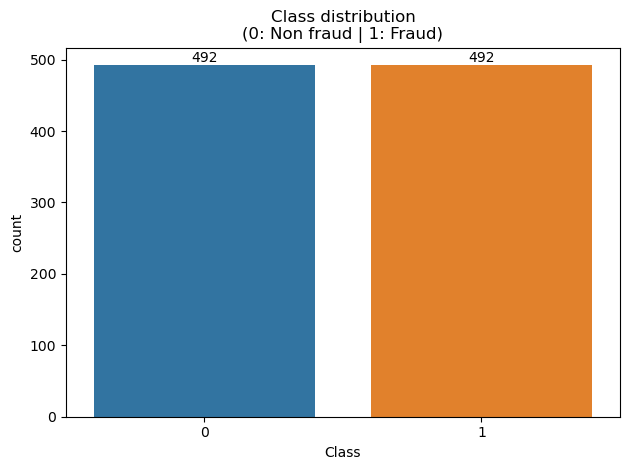

In [14]:
fig = sns.countplot(data=subsampled_data, x="Class")
fig.bar_label(fig.containers[0])
plt.title("Class distribution\n(0: Non fraud | 1: Fraud)")
plt.tight_layout()
plt.show()

In the following figure, we can see how the correlation matrix is affected by the dominance of class 0 (Non-Fraud). We can easily observe the difference when compared to the correlation matrix of the subsampled dataset.

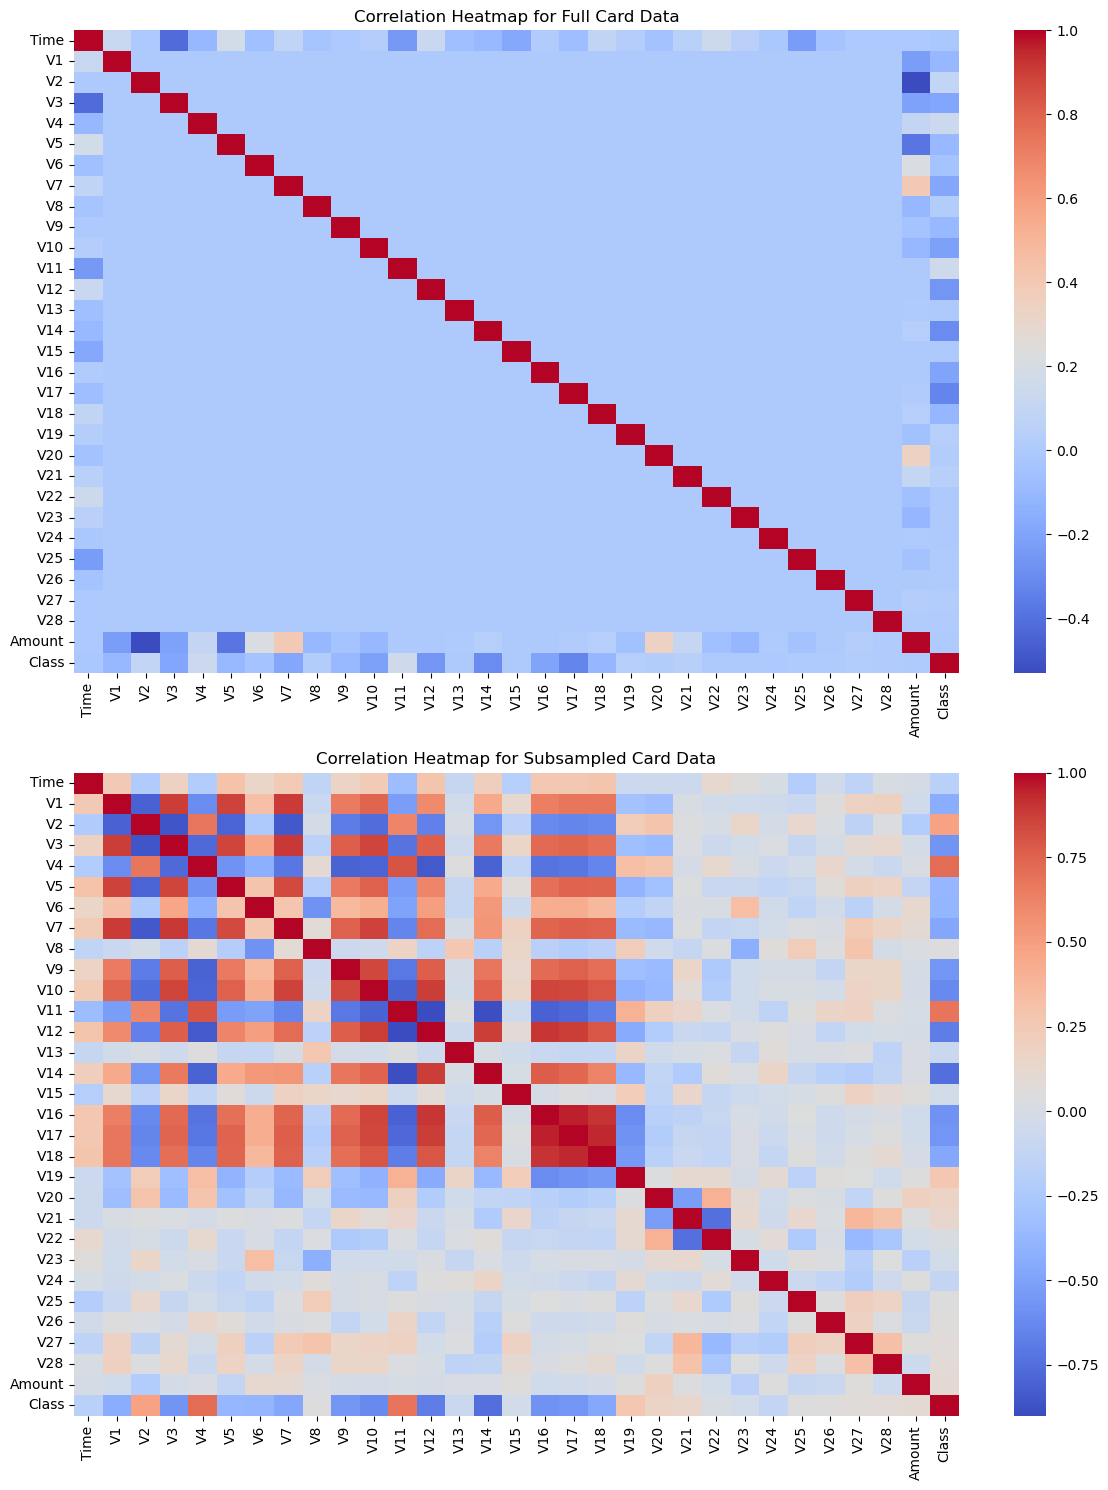

In [15]:
fig, ax = plt.subplots(2, 1, figsize=[12, 15])

# Create the first heatmap with a title
sns.heatmap(ax=ax[0], data=card_data.corr(numeric_only=True), cmap="coolwarm")
ax[0].set_title("Correlation Heatmap for Full Card Data")

# Create the second heatmap with a title
sns.heatmap(ax=ax[1], data=subsampled_data.corr(numeric_only=True), cmap="coolwarm")
ax[1].set_title("Correlation Heatmap for Subsampled Card Data")

plt.tight_layout()
plt.show()


## Data scaling and Splitting

In [16]:
robust_scaler = RobustScaler()

# Assuming 'Time' is a column in your 'subsampled_data' DataFrame
subsampled_data["Time"] = robust_scaler.fit_transform(subsampled_data["Time"].values.reshape(-1, 1))
subsampled_data["Amount"] = robust_scaler.fit_transform(subsampled_data["Amount"].values.reshape(-1, 1))

In [17]:
X = subsampled_data.drop(columns="Class")
y = subsampled_data.Class

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

## Modelo de clasificación (regresión logística)

In [19]:
# Let us implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(max_iter=5000),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [20]:
# Let us test all the classifiers using cross validation
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(f"Classifiers: {classifier.__class__.__name__}, has a training score of {round(training_score.mean(), 2) * 100}% accuracy score")

Classifiers: LogisticRegression, has a training score of 94.0% accuracy score


Classifiers: KNeighborsClassifier, has a training score of 94.0% accuracy score
Classifiers: SVC, has a training score of 94.0% accuracy score
Classifiers: DecisionTreeClassifier, has a training score of 90.0% accuracy score


Como primer modelo, vamos a implementar `LogisticRegression`. Posteriormente, iremos incorporando más y comparando los resultados.

In [21]:
# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2', 'elasticnet'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['liblinear', 'saga']}

grid_log_reg = GridSearchCV(LogisticRegression(max_iter=5000), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

c:\Users\Javier\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Javier\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Javier\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Javier\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(s

In [ ]:
y_pred = log_reg.predict(X_test)

## Model Metrics

In [22]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print(f'Logistic Regression Cross Validation Score: {round(log_reg_score.mean() * 100, 2)} %')

Logistic Regression Cross Validation Score: 94.41 %


In [24]:
sklearn.metrics.accuracy_score(y_test, y_pred)

0.9289340101522843

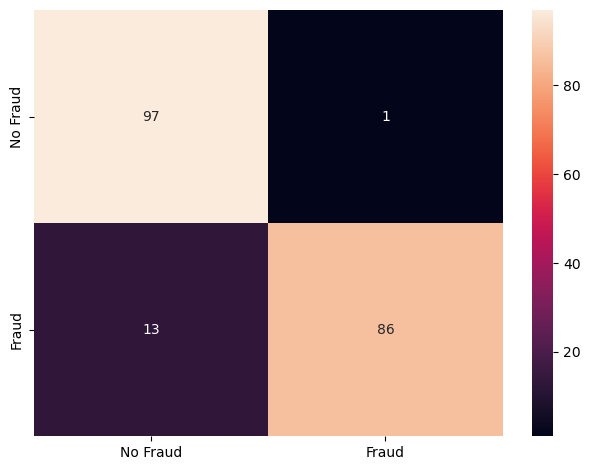

In [25]:
labels = ['No Fraud', 'Fraud']

sns.heatmap(sklearn.metrics.confusion_matrix(y_test, y_pred), annot=True, xticklabels=labels, yticklabels=labels)

plt.tight_layout()
plt.show()

In [26]:
logit_roc_auc = sklearn.metrics.roc_auc_score(y_test, log_reg.predict(X_test))
log_fpr, log_tpr, log_thresold = sklearn.metrics.roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])

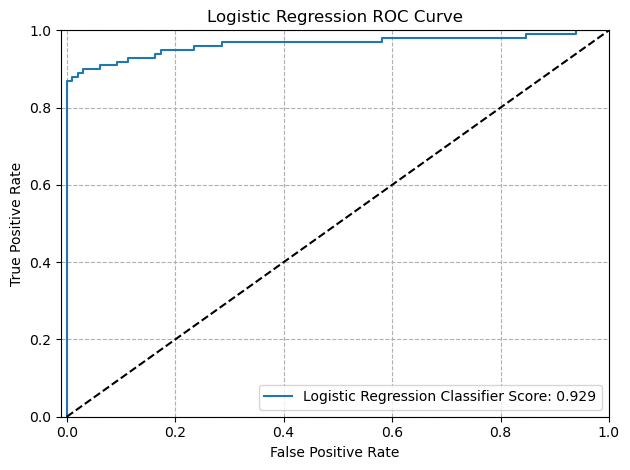

In [27]:
plt.plot(log_fpr, log_tpr, label=f"Logistic Regression Classifier Score: {round(logit_roc_auc, 3)}")
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend()
plt.grid(linestyle="dashed")

plt.tight_layout()
plt.show()

In [28]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93        98
           1       0.99      0.87      0.92        99

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197

